# 机器学习：实践作业一

**王海生 10235101559**

In [1]:
# 环境配置
%pip install numpy pandas matplotlib
%pip install openpyxl

Looking in indexes: https://mirrors.tuna.tsinghua.edu.cn/pypi/web/simple
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://mirrors.tuna.tsinghua.edu.cn/pypi/web/simple
Note: you may need to restart the kernel to use updated packages.


In [2]:
# 导入库
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 创建和操作数组

### 创建一个一维数组 A，包含 10 个从 1 到 10 的整数

In [3]:
A = np.arange(1, 11)
print("一维数组 A:\n", A)

一维数组 A:
 [ 1  2  3  4  5  6  7  8  9 10]


### 创建一个二维数组 B，4 行 5 列，元素随机

In [4]:
B = np.random.randint(1, 100, size=(4, 5))
print("二维数组 B:\n", B)

二维数组 B:
 [[15 28 92 21 33]
 [76 31 61 98 35]
 [58  3 34 99 79]
 [39 99 12 26  5]]


### 对上述一维数组 A 进行转置，并展示结果

In [5]:
A = A.T
print("转置后的一维数组 A:\n", A)

转置后的一维数组 A:
 [ 1  2  3  4  5  6  7  8  9 10]


In [6]:
A = A.reshape(-1, 1)
print("使用 reshape 方法:\n", A)

使用 reshape 方法:
 [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


### 将二维数组 B 的所有元素加 1，并展示结果

In [7]:
B = B + 1
print("二维数组 B 的所有元素加 1:\n", B)

二维数组 B 的所有元素加 1:
 [[ 16  29  93  22  34]
 [ 77  32  62  99  36]
 [ 59   4  35 100  80]
 [ 40 100  13  27   6]]


## 数组索引和切片

### 从二维数组 B 中选取第 2 行第 3 列的元素

In [8]:
ele_2_3 = B[1, 2]
print("B 的第 2 行第 3 列的元素:\n", ele_2_3)

B 的第 2 行第 3 列的元素:
 62


### 选取二维数组 B 的第 2 行和第 3 列

In [9]:
row_2 = B[1, :]
col_3 = B[:, 2]
print("B 的第 2 行:\n", row_2)
print("B 的第 3 列:\n", col_3)

B 的第 2 行:
 [77 32 62 99 36]
B 的第 3 列:
 [93 62 35 13]


### 选取二维数组 B 的前两行和前两列

In [10]:
B_slice = B[:2, :2]
print("B 的前两行前两列:\n", B_slice)

B 的前两行前两列:
 [[16 29]
 [77 32]]


## 数组运算

### 对两个一维数组 A 进行元素级加法

In [11]:
A = np.arange(1, 11)
A_sum = A + A
print("两个 A 元素级加法:\n", A_sum)

两个 A 元素级加法:
 [ 2  4  6  8 10 12 14 16 18 20]


### 计算二维数组 B 每行的平均值，并创建一个新数组保存这些平均值

In [12]:
B_row_mean = np.mean(B, axis=1)
print("B 每行的平均值:\n", B_row_mean)

B 每行的平均值:
 [38.8 61.2 55.6 37.2]


## 使用 Numpy 函数

### 使用 numpy.mean()计算一维数组 A 的平均值

In [13]:
A_mean = np.mean(A)
print("A 的平均值:\n", A_mean)

A 的平均值:
 5.5


### 使用 numpy.std()计算一维数组 A 的标准差

In [14]:
A_std = np.std(A)
print("A 的标准差:\n", A_std)

A 的标准差:
 2.8722813232690143


### 使用 numpy.sort()对一个一维数组 A 进行排序，并展示结果

In [15]:
A_sorted = np.sort(A)
print("排序后的一维数组 A:\n", A_sorted)

排序后的一维数组 A:
 [ 1  2  3  4  5  6  7  8  9 10]


## 复杂数据分析

### 读取提供的score.xlsx文件，编程实现：输入任意一个学号，将该学号对应的成绩，通过雷达图显示

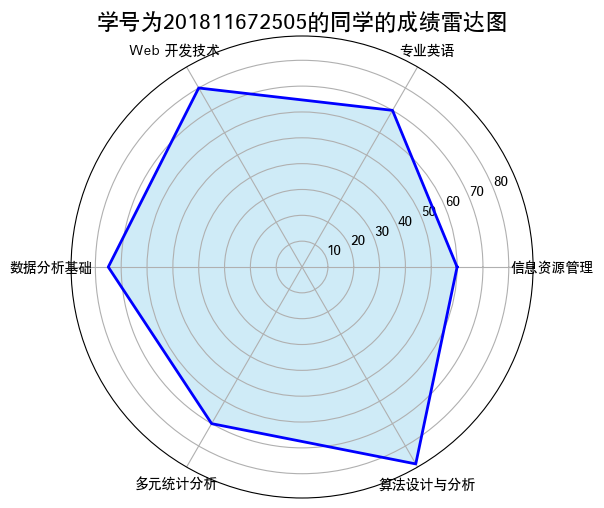

In [16]:
# 设置matplotlib支持中文显示
plt.rcParams['font.sans-serif'] = ['Hei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号

# 读取Excel文件
df = pd.read_excel("data/score.xlsx")

# 需查找的学号
# student_id = int(input("请输入学号: "))
student_id = 201811672505

# 查找该学号对应的成绩行
student_row = df[df['学号'] == student_id]

if student_row.empty:
    print("未找到该学号，请检查输入。")
else:
    # 取出该学生的成绩
    subjects = df.columns[1:]
    scores = student_row[subjects].values.flatten()

    # 构建雷达图角度
    angles = np.linspace(0, 2*np.pi, len(subjects), endpoint=False)
    scores = np.concatenate((scores, [scores[0]]))  # 闭合雷达图
    angles = np.concatenate((angles, [angles[0]]))

    # 绘制雷达图
    plt.figure(figsize=(6,6))
    plt.polar(angles, scores, 'b-', linewidth=2)
    plt.fill(angles, scores, 'skyblue', alpha=0.4)
    plt.xticks(angles[:-1], subjects)
    plt.title(f"学号为{student_id}的同学的成绩雷达图", fontsize=16)
    plt.savefig(f'result/radar_{student_id}.png')
    plt.show()

### 统计所有同学的成绩总分，将总分在前6名的同学总分用柱形图显示出来。（纵坐标标签是"总分"，横坐标标签是"学号"，每个柱形上方显示具体的成绩总分）

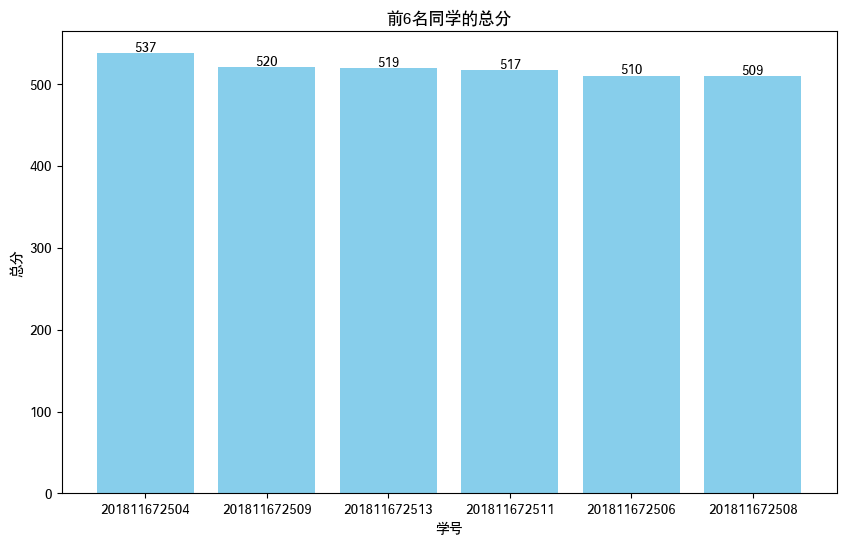

In [17]:
# 计算所有同学的成绩总分
df['总分'] = df.iloc[:, 1:].sum(axis=1)

# 按总分降序排序并取前6名
top6 = df.sort_values('总分', ascending=False).head(6)

# 绘制柱形图
plt.figure(figsize=(10, 6))
bars = plt.bar(top6['学号'].astype(str), top6['总分'], color='skyblue')
plt.xlabel('学号')
plt.ylabel('总分')
plt.title('前6名同学的总分')

# 在每个柱形上方显示具体的总分
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.savefig(f'result/bar.png')
plt.show()

### 编写程序，输入任意课程名称，统计该课程的各个成绩等级的比例，用饼状图显示。（优秀：90-100；良好：80-89；中等：70-79；及格：60-69；不及格：0-59

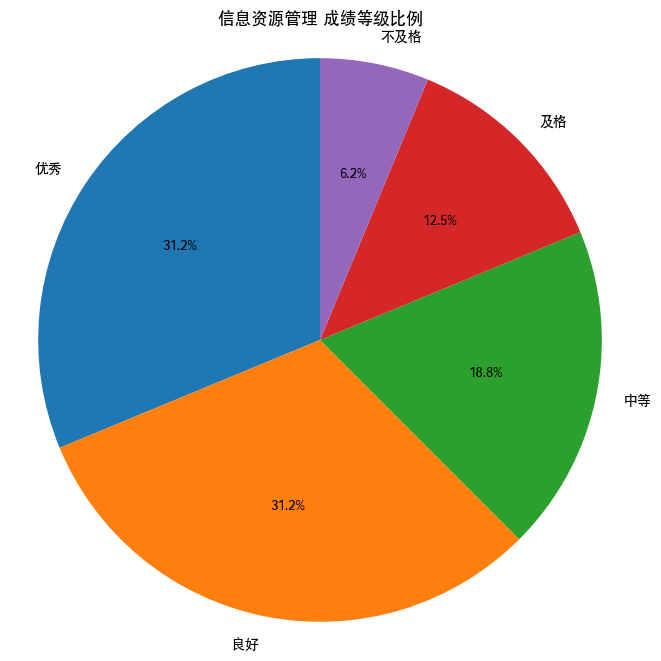

In [18]:
# 输入课程名称
# course = input("请输入课程名称: ")
course = "信息资源管理"

# 检查课程是否存在
if course not in df.columns:
    print("未找到该课程")
else:
    # 获取该课程的所有成绩
    scores = df[course].values
    
    # 统计各个成绩等级的数量
    excellent = np.sum((scores >= 90) & (scores <= 100))
    good = np.sum((scores >= 80) & (scores < 90))
    medium = np.sum((scores >= 70) & (scores < 80))
    pass_ = np.sum((scores >= 60) & (scores < 70))
    fail = np.sum(scores < 60)
    
    # 计算比例（百分比）
    total = len(scores)
    labels = ['优秀', '良好', '中等', '及格', '不及格']
    sizes = [excellent / total * 100, good / total * 100, medium / total * 100, pass_ / total * 100, fail / total * 100]
    
    # 绘制饼状图
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(f'{course} 成绩等级比例')
    plt.axis('equal')  # 确保饼状图为圆形
    plt.savefig(f'result/pie_{course}.png')
    plt.show()